# Introduction to regression and classificiation

### Imports for this lesson

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Linear Regression

In [7]:
df = pd.read_csv("data/weight-height.csv")
# from pounds to kg
df['Weight'] *= 0.453592
# from inches to meters
df['Height'] *= 2.54*1e-2
df

,Gender,Height,Weight
0,Male,1.875714,109.720985
1,Male,1.747060,73.622732
2,Male,1.882397,96.497550
3,Male,1.821967,99.809504
4,Male,1.774998,93.598619
...,...,...,...
9995,Female,1.680785,62.041159
9996,Female,1.703506,77.504315
9997,Female,1.622247,58.275377
9998,Female,1.753470,74.322166


In [4]:
class LinearRegression:
    def __init__(self, weigth_0, intercept_0):
        self.weight_0 = weight_0
        self.intercept_0 = intercept_0

    def fit(self,X,Y, learning_rate):
        X=np.array(X).reshape(-1,1)
        Y=np.array(Y).reshape(-1,1)
        num_var = X.shape[1]
        #initialize weight and intercept
        self.weight = self.weight_0
        self.intercept = self.intercept_0

        for i in range(50):
            self.dcostdm =  np.sum(np.multiply(((np.matmul(X,self.weight)+self.intercept)-Y),X))*2/X.shape[0]
            self.dcostdc = np.sum(((np.matmul(X,self.weight)+self.intercept)-Y))*2/X.shape[0]            
            self.weight -= learning_rate*self.dcostdm 
            self.intercept -= learning_rate*self.dcostdc

        return self.weight,self.intercept

    def predict(self,X):
        product =  np.matmul(np.array(X).reshape(-1,1),self.weight)+self.intercept
        return product

In [8]:
#standardization of the dataset
mean_weight = df['Weight'].mean()
std_weight = df['Weight'].std()
mean_height = df['Height'].mean()
std_height = df['Height'].std()
x = (df['Weight']-df['Weight'].mean())/df['Weight'].std()
y = (df['Height']-df['Height'].mean())/df['Height'].std()

(array([[0.92471458]]), array([8.17807119e-06]))


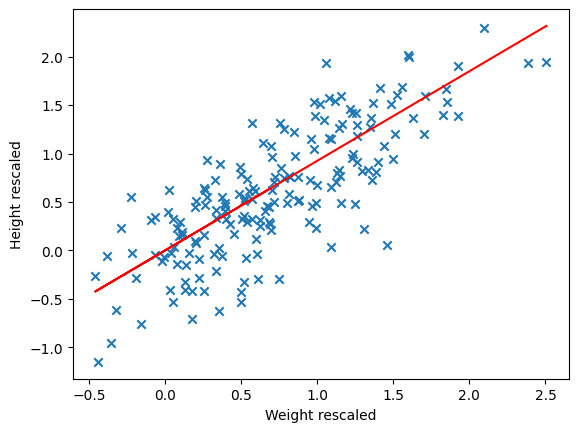

In [13]:
weight_0 = np.random.normal(-1,1,(1,1))
intercept_0 = np.random.rand(1)

reg = LinearRegression(weight_0, intercept_0)
params = reg.fit(x,y, 0.1)
plt.scatter(x[:180],y[:180], marker="x")
pred = np.matmul(np.array(x[:180]).reshape(-1,1),params[0])+params[1]
plt.plot(x[:180],pred,'r')
plt.xlabel("Weight rescaled")
plt.ylabel("Height rescaled")
print(params)

Text(0, 0.5, 'Height (m)')

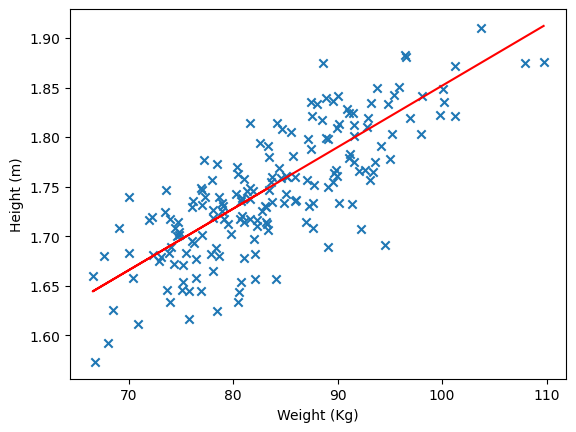

In [12]:
plt.scatter(df['Weight'][:180],df['Height'][:180], marker="x")
new_m = std_height*params[0]/std_weight
new_q = params[1]*std_height - params[0]*std_height*mean_weight/std_weight + mean_height
pred = np.matmul(np.array(df['Weight'][:180]).reshape(-1,1),new_m)+new_q
plt.plot(df['Weight'][:180],pred,'r')
plt.xlabel("Weight (Kg)")
plt.ylabel("Height (m)")

## Logistic Regression

### A toy example

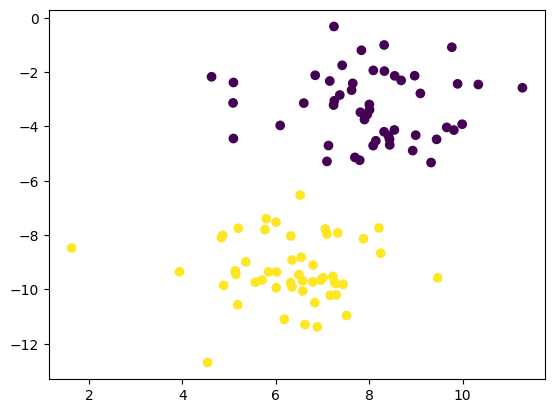

In [18]:
# Toy dataset using sklearn make_blobs function
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=6,cluster_std=1.3)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [19]:
#FIXME: improve documentation and names
class LogisticRegression:
    
    def __init__ (self,n_iter,l_rate,random_state):
        
        self.n_iter=n_iter # number of itirations 
        self.l_rate=l_rate # learning rate
        self.random_state=random_state # random_state for weights generation
        
    def fit (self,X,y): # weights update process and cost monitoring 
        
        # for initial weights assignment I use numpy.random.RandomState which is a
        # container with number of methods for random numbers generation
        # drawn from a variety of probability distributions
        
        rgen=np.random.RandomState(self.random_state)
        
        # weights initialisation
        # normal (Gaussian) distribution is used with mean equals to 0.0 and std to 0.01 and size
        # corresponding to number of features + bias (intercept)
        
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=X.shape[1]+1)
        
        self.cost_=[]
        
        for i in range(self.n_iter):
            
            output=(self.sigmoid(self.dot_product(X)))
            
            errors=(y-output) # error calculation
            
            self.w_[:2]+=self.l_rate*X.T.dot(errors) # weights update process
            
            self.w_[2]+=self.l_rate*errors.sum()
            
            cost = (-y.dot(np.log(output))-((1 - y).dot(np.log(1 - output)))) # cost function
            
            self.cost_.append(cost)
        
        return self
        
    def dot_product (self,X): 
        
        return np.dot(X,self.w_[:2])+self.w_[2]
        
    def sigmoid (self,z): # Sigmoid function
        
        return 1/(1+np.exp(-z))
        
    def predict (self,X): # Prediction function using np.where
        
        return np.where(self.sigmoid(self.dot_product(X))>=0.5,1,0)